Beata Sirowy

# A Machine Learning project: 
# California Housing Prices

Based on:
Geron, A. (2023) _Hands-On Machine Learning
with Scikit-Learn, Keras, and TensorFlow_ 

Liu, Y. (2020) _Python Machine Learning By Example_


Popular open data repositories for ML projects include:
- OpenML.org
- Kaggle.com
- PapersWithCode.com
- UC Irvine Machine Learning Repository
- Amazon’s AWS datasets
- TensorFlow datasets

Meta portals (they list open data repositories):
- DataPortals.org
- OpenDataMonitor.eu

Other pages listing many popular open data repositories:

- Wikipedia’s list of machine learning datasets
- Quora.com
- The datasets subreddit


## The task

We’ll use the California Housing Prices dataset from the
StatLib repository. This dataset is based on data from the
1990 California census.

Our first task is
- to use California census data to build a model of housing prices in the state.

Our data includes metrics such as the population, median income, and
median housing price for each block group in California. 

Block groups are
the smallest geographical unit for which the US Census Bureau publishes
sample data (a block group typically has a population of 600 to 3,000
people). We will call them “districts” for short.

- Our model should learn from this data and be able to predict the median
housing price in any district, given all the other metrics.

### Framing the problem

#### __1. How does the company expect to use and benefit from this model?__
- the model’s output (a prediction of a district’s
median housing price) will be fed to another machine learning system (see
Figure 2-2), along with many other signals
- this downstream system will
determine whether it is worth investing in a given area 
- getting this right is
critical, as it directly affects revenue.


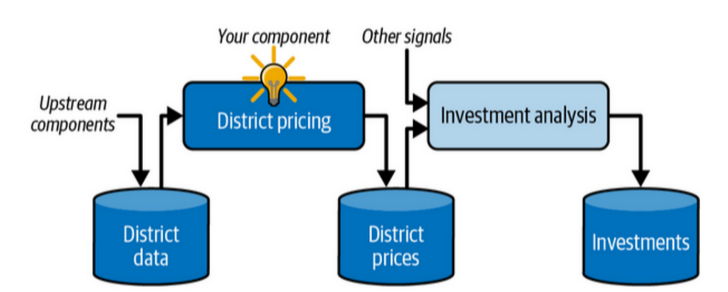

__A data pipeline:__ a sequence of data processing components 
- Pipelines are very common in machine learning systems, since there is
a lot of data to manipulate and many data transformations to apply.
- omponents typically run asynchronously. 
- Each component pulls in a
large amount of data, processes it, and spits out the result in another
data store. 
- Then, some time later, the next component in the pipeline
pulls in this data and spits out its own output. 
- Each component is fairly
self-contained: the interface between components is simply the data
store. 
- This makes the system simple to grasp (with the help of a data
flow graph), and different teams can focus on different components.
- If a component breaks down, the downstream components
can often continue to run normally (at least for a while) by just using
the last output from the broken component. This makes the architecture
quite robust.
- On the other hand, a broken component can go unnoticed for some time
if proper monitoring is not implemented. The data gets stale and the
overall system’s performance drops.

#### __2. What the current solution looks like (if any).__

- the
district housing prices are currently estimated manually by experts:
- a team
gathers up-to-date information about a district, and when they cannot get
the median housing price, they estimate it using complex rules.
- this is costly and time-consuming, and their estimates are not great; in
cases where they manage to find out the actual median housing price, they
often realize that their estimates were off by more than 30%.

#### __3. Designing the system__
- supervised, unsupervised, semi-supervised, self-supervised, or
reinforcement learning task? 
- a classification task, a regression
task, or something else? 
- batch learning or online learning
techniques?

This is clearly a typical __supervised
learning__ task, since the model can be trained with labeled examples (each
instance comes with the expected output, i.e., the district’s median housing
price). 

It is a typical regression task, since the model will be asked to
predict a value. 
- More specifically, this is __a multiple regression problem__,
since the system will use multiple features to make a prediction.
- It is also a univariate
regression problem, since we are only trying to predict a single value for
each district. 
- If we were trying to predict multiple values per district, it
would be a multivariate regression problem.

There is no continuous
flow of data coming into the system, there is no particular need to adjust to
changing data rapidly, and the data is small enough to fit in memory, so
plain __batch learning__ should do just fine.

If the data were huge, you could either split your batch learning work across multiple
servers (using the MapReduce technique) or use an online learning technique.

#### __4. Select a Performance Measure__

A typical performance
measure for regression problems is the __root mean square error (RMSE)__. 

It
gives an idea of how much error the system typically makes in its
predictions, with a higher weight given to large errors.

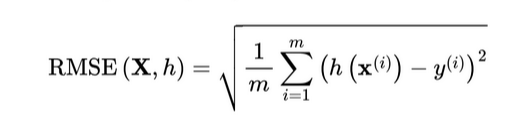

- m is the number of instances in the dataset you are measuring the
RMSE on.
- x(i) is a vector of all the feature values (excluding the label) of the
i instance in the dataset, 
-y(i) is its label (the desired output
value for that instance).

For example, if the first district in the dataset is located at
longitude –118.29°, latitude 33.91°, and it has 1,416
inhabitants with a median income of $38,372, and the median
house value is $156,400 (ignoring other features for now),
then:

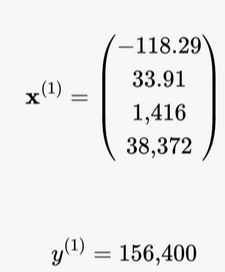

For a district, we have a matrix X:

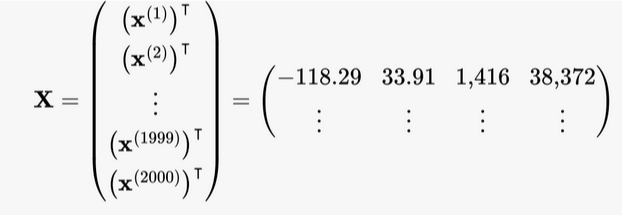

h is your system’s prediction function, also called a hypothesis.
- when your system is given an instance’s feature vector x(i) , it
outputs a predicted value ŷ(i) = h(x(i) ) for that instance (ŷ is
pronounced “y-hat”).

For example, if your system predicts that the median housing
price in the first district is $158,400, then ŷ(1) = h(x(1) ) =
158,400. The prediction error for this district is ŷ(1) – y(1) =
2,000.

RMSE(X,h) is the cost function measured on the set of examples
using your hypothesis h.


We use:  
- lowercase italic font for scalar values (such as _m_ or _y(i)_ ) and
function names (such as _h_), 
- lowercase bold font for vectors (such as
__x__ ), 
- uppercase bold font for matrices (such as __X__).






Although the RMSE is generally the preferred performance measure for
regression tasks, in some contexts you may prefer to use another function.
- For example, if there are many outlier districts. In that case, you may
consider using the __mean absolute error__ (MAE, also called the average
absolute deviation),

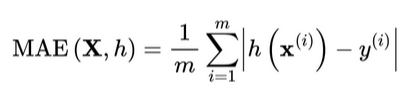

Both the RMSE and the MAE are ways to measure __the distance between
two vectors: the vector of predictions and the vector of target values__.

Computing the root of a sum of squares __(RMSE)__ corresponds to the
__Euclidean norm__ (l2 norm): this is the notion of distance we are all familiar with.

Computing the sum of absolutes __(MAE)__ corresponds to the l1 norm,
noted. This is sometimes called the __Manhattan norm__ because it
measures the distance between two points in a city if you can only
travel along orthogonal city blocks.

The higher the norm index, the more it focuses on large values and neglects
small ones. 
- This is why the __RMSE is more sensitive to outliers__ than the
MAE. 
- But when outliers are exponentially rare (like in a bell-shaped curve),
the __RMSE performs very well and is generally preferred__.

#### __5. Check the Assumptions__
Lastly, it is good practice to list and verify the assumptions that have been
made so far (by you or others).

For example, the district prices that your system outputs are going to be
fed into a downstream machine learning system, and you assume that these
prices are going to be used as such. 

But what if the downstream system
converts the prices into categories (e.g., “cheap”, “medium”, or
“expensive”) and then uses those categories instead of the prices
themselves? 

In this case, getting the price perfectly right is not important at
all; your system just needs to get the category right. If that’s so, then the
problem should have been framed as a classification task, not a regression task.

## Get the data
